# Figure 5: MNIST and CIFAR-10 theoretical DAE/WDAE learning dynamics compared to actual learning dynamics.

This notebook provides the code to produce Figure 5 in the paper: "Learning dynamics of linear denoising autoencoders". (ICML 2018)

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import torch
from torchvision import transforms
from torchvision.datasets import MNIST
from torchvision.datasets import CIFAR10
from collections import OrderedDict

# custom imports
from src.linear_ae_net.linear_ae_net import LinearAutoEncoder
from src.linear_ae_net.dynamics import theoretical_learning_dynamics

## --- MNIST ---

### Load MNIST data

In [2]:
# cast to tensor
trans = transforms.Compose([transforms.ToTensor()])

# if not exist, download mnist dataset
train_set = MNIST(root="../data", train=True, transform=trans, download=True)
x_train = train_set.train_data.numpy()
x_train = x_train.astype('float32') / 255.
x_train_mnist = x_train.reshape((len(x_train), np.prod(x_train.shape[1:])))
print(x_train_mnist.shape)

(60000, 784)


### Train models

In [3]:
# set parameters
num_samples = 50000
epochs = 5000
lr = 0.01
reg_param = 0.5
var_param = 0.5
reg = [0.0, reg_param, 0.0]
var = [0.0, 0.0, var_param]
num_trials = 3
hidden_dim = 256

mnist_models = []

# convert to pytorch tensors
x_train_mnist = torch.from_numpy(x_train_mnist)

# set seed
np.random.seed(123)
torch.manual_seed(321)

# train autoencoder network
for t in range(num_trials):
    laeModel = LinearAutoEncoder()
    laeModel.train(x_train_mnist[:num_samples,], None, input_dim=784, n_epoch=epochs, 
                   hidden_dim=hidden_dim, learning_rate=lr, reg_param=reg[t], 
                   noise='Gaussian', noise_scale=var[t], verbose=True)
    mnist_models.append(laeModel)

iteration:  0 training loss:  44.02943
iteration:  100 training loss:  24.8457825
iteration:  200 training loss:  19.9702025
iteration:  300 training loss:  16.7520825
iteration:  400 training loss:  15.1346225
iteration:  500 training loss:  13.7594
iteration:  600 training loss:  12.7403
iteration:  700 training loss:  11.8747925
iteration:  800 training loss:  11.01980625
iteration:  900 training loss:  10.36042
iteration:  1000 training loss:  9.82152375
iteration:  1100 training loss:  9.335228125
iteration:  1200 training loss:  8.90901875
iteration:  1300 training loss:  8.512016875
iteration:  1400 training loss:  8.130021875
iteration:  1500 training loss:  7.7814675
iteration:  1600 training loss:  7.481425
iteration:  1700 training loss:  7.23100875
iteration:  1800 training loss:  7.01295875
iteration:  1900 training loss:  6.80954125
iteration:  2000 training loss:  6.6159675
iteration:  2100 training loss:  6.434506875
iteration:  2200 training loss:  6.266335
iteration: 

### Compute theoretical dynamics

In [4]:
# compute MNIST dynamics
x_train_mnist_np = x_train_mnist.cpu().numpy()
theoretical_dynamics_mnist = theoretical_learning_dynamics(x_train_mnist_np[:num_samples, :], 
                                                        x_train_mnist_np[:num_samples, :], 
                                                        n_epoch=epochs, lr=lr, 
                                                        var=0, reg=0)
theoretical_dynamics_reg_mnist = theoretical_learning_dynamics(x_train_mnist_np[:num_samples, :], 
                                                            x_train_mnist_np[:num_samples, :], 
                                                            n_epoch=epochs, lr=lr, 
                                                            var=0, reg=reg_param)
theoretical_dynamics_noise_mnist = theoretical_learning_dynamics(x_train_mnist_np[:num_samples, :], 
                                                                x_train_mnist_np[:num_samples, :], 
                                                                n_epoch=epochs, lr=lr, 
                                                                var=var_param, reg=0)

/home/canyon/Desktop/PhD/lindaedynamics_icml2018/src/linear_ae_net/dynamics.py:13: RuntimeWarning: overflow encountered in multiply
  num = (lam - g)*E
/home/canyon/Desktop/PhD/lindaedynamics_icml2018/src/linear_ae_net/dynamics.py:14: RuntimeWarning: overflow encountered in multiply
  denom = xi*(E - 1) + (lam - g)/u0
/home/canyon/Desktop/PhD/lindaedynamics_icml2018/src/linear_ae_net/dynamics.py:15: RuntimeWarning: invalid value encountered in true_divide
  uf = num/denom
/home/canyon/Desktop/PhD/lindaedynamics_icml2018/src/linear_ae_net/dynamics.py:12: RuntimeWarning: overflow encountered in exp
  E = np.exp((2*(lam - g)*t)/tau)


## --- CIFAR-10 ---

### Load CIFAR-10 data

In [5]:
trans = transforms.Compose([transforms.ToTensor()])
train_set = CIFAR10(root="../data", train=True, transform=trans, download=True)
x_train = train_set.train_data
x_train = x_train.astype('float32')
x_train /= 255
x_train_cifar10 = x_train.reshape((len(x_train), np.prod(x_train.shape[1:])))
print('x_train shape:', x_train_cifar10.shape)

Files already downloaded and verified
x_train shape: (50000, 3072)


### Train models

In [6]:
# set parameters
num_samples = 30000
epochs = 5000
lr = 0.001
reg_param = 0.5
var_param = 0.5
reg = [0.0, reg_param, 0.0]
var = [0.0, 0.0, var_param]
num_trials = 3
hidden_dim = 512

cifar10_models = []

# convert to pytorch tensors
x_train_cifar10 = torch.from_numpy(x_train_cifar10)

# set seed
np.random.seed(123)
torch.manual_seed(321)

# train autoencoder networks
for t in range(num_trials):
    laeModel = LinearAutoEncoder()
    laeModel.train(x_train_cifar10[:num_samples,], None, input_dim=32*32*3, 
                   n_epoch=epochs, hidden_dim=hidden_dim, 
                   learning_rate=lr, reg_param=reg[t], 
                   noise='Gaussian', noise_scale=var[t], verbose=True)
    cifar10_models.append(laeModel)

iteration:  0 training loss:  441.4945
iteration:  100 training loss:  70.669275
iteration:  200 training loss:  69.72841666666666
iteration:  300 training loss:  58.50202916666667
iteration:  400 training loss:  55.80244166666667
iteration:  500 training loss:  51.31717916666667
iteration:  600 training loss:  50.850366666666666
iteration:  700 training loss:  49.964591666666664
iteration:  800 training loss:  47.663066666666666
iteration:  900 training loss:  44.86217083333333
iteration:  1000 training loss:  43.0299125
iteration:  1100 training loss:  41.507079166666664
iteration:  1200 training loss:  39.72484583333333
iteration:  1300 training loss:  38.2270125
iteration:  1400 training loss:  37.11287083333333
iteration:  1500 training loss:  36.04869583333333
iteration:  1600 training loss:  35.109366666666666
iteration:  1700 training loss:  34.52857083333333
iteration:  1800 training loss:  34.24288958333333
iteration:  1900 training loss:  34.055233333333334
iteration:  2000 

### Compute theoretical dynamics

In [7]:
# compute CIFAR-10 dynamics
x_train_cifar10_np = x_train_cifar10.cpu().numpy()
theoretical_dynamics_cifar10 = theoretical_learning_dynamics(x_train_cifar10_np[:num_samples, :], 
                                                        x_train_cifar10_np[:num_samples, :], 
                                                        n_epoch=epochs, lr=lr, var=0, 
                                                        reg=0, u0 = 1.5e-6)
theoretical_dynamics_reg_cifar10 = theoretical_learning_dynamics(x_train_cifar10_np[:num_samples, :], 
                                                            x_train_cifar10_np[:num_samples, :], 
                                                            n_epoch=epochs, lr=lr, var=0, 
                                                            reg=reg_param, u0 = 1.5e-6)
theoretical_dynamics_noise_cifar10 = theoretical_learning_dynamics(x_train_cifar10_np[:num_samples, :], 
                                                            x_train_cifar10_np[:num_samples, :], 
                                                            n_epoch=epochs, lr=lr, var=var_param, 
                                                            reg=0, u0 = 1.5e-6) 

/home/canyon/Desktop/PhD/lindaedynamics_icml2018/src/linear_ae_net/dynamics.py:13: RuntimeWarning: overflow encountered in multiply
  num = (lam - g)*E
/home/canyon/Desktop/PhD/lindaedynamics_icml2018/src/linear_ae_net/dynamics.py:14: RuntimeWarning: overflow encountered in multiply
  denom = xi*(E - 1) + (lam - g)/u0
/home/canyon/Desktop/PhD/lindaedynamics_icml2018/src/linear_ae_net/dynamics.py:15: RuntimeWarning: invalid value encountered in true_divide
  uf = num/denom
/home/canyon/Desktop/PhD/lindaedynamics_icml2018/src/linear_ae_net/dynamics.py:12: RuntimeWarning: overflow encountered in exp
  E = np.exp((2*(lam - g)*t)/tau)


### Plot results

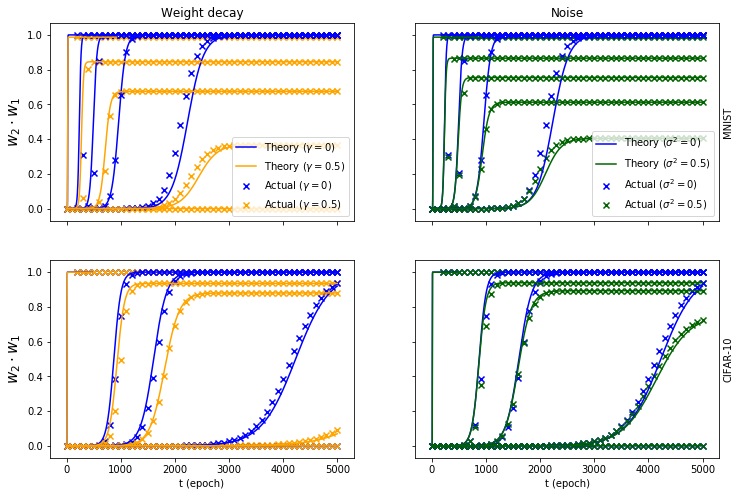

In [8]:
# create dynamics plot
slices = (0, 3, 7, 15, 31)
fig, [(ax1, ax2), (ax3, ax4)] = plt.subplots(2, 2, figsize=(12, 8), sharey='row', sharex='col')
axes = [ax1, ax2]

# plot theoretical dynamics
ax1.plot(theoretical_dynamics_mnist[:, slices], c='blue', 
         label='Theory ($\gamma = 0$)')
ax1.plot(theoretical_dynamics_reg_mnist[:, slices], c='orange', 
         label='Theory ($\gamma = $' + str(reg_param) + ')')
ax2.plot(theoretical_dynamics_mnist[:, slices], c='blue', 
         label='Theory ($\sigma^2 = 0$)')
ax2.plot(theoretical_dynamics_noise_mnist[:, slices], c='darkgreen', 
         label='Theory ($\sigma^2 = $' + str(var_param) + ')')

# get actual dynamics
actual_dynamics_mnist = mnist_models[0].strenghts.cpu().numpy()
actual_dynamics_reg_mnist = mnist_models[1].strenghts.cpu().numpy()
actual_dynamics_noise_mnist = mnist_models[2].strenghts.cpu().numpy()

# plot simulated dynamics
x_p = np.arange(0, epochs+1, 100)
for s in slices:
    ax1.scatter(x_p, actual_dynamics_mnist[:, s], c='blue', 
                marker='x', label='Actual ($\gamma = 0$)')
    ax1.scatter(x_p, actual_dynamics_reg_mnist[:, s], c='orange', 
                marker='x', label='Actual ($\gamma = $' + str(reg_param) + ')')
    ax2.scatter(x_p, actual_dynamics_mnist[:, s], c='blue', 
                marker='x', label='Actual ($\sigma^2 = 0$)')
    ax2.scatter(x_p, actual_dynamics_noise_mnist[:, s], c='darkgreen',
                marker='x', label='Actual ($\sigma^2 = $' + str(var_param) + ')')
    
    
# set plot titles and axis labels
ax1.set_ylabel('$w_2 \cdot w_1$', fontsize=15)
ax1.set_title('Weight decay')
ax2.yaxis.set_label_position('right')
ax2.set_ylabel('MNIST')

# remove duplicates labels
locations = ['lower right', 'lower right', 'upper right', 'upper right']
for ax, loc in zip(axes, locations):
    handles, labels = ax.get_legend_handles_labels()
    by_label = OrderedDict(zip(labels, handles))
    ax.legend(by_label.values(), by_label.keys(), loc=loc)

# plot theoretical dynamics
ax3.plot(theoretical_dynamics_cifar10[:, slices], c='blue')
ax3.plot(theoretical_dynamics_reg_cifar10[:, slices], c='orange')
ax4.plot(theoretical_dynamics_cifar10[:, slices], c='blue')
ax4.plot(theoretical_dynamics_noise_cifar10[:, slices], c='darkgreen')

# get actual dynamics
actual_dynamics_cifar10 = cifar10_models[0].strenghts.cpu().numpy()
actual_dynamics_reg_cifar10 = cifar10_models[1].strenghts.cpu().numpy()
actual_dynamics_noise_cifar10 = cifar10_models[2].strenghts.cpu().numpy()

# plot simulated dynamics
x_p = np.arange(0, epochs+1, 100)
for s in slices:
    ax3.scatter(x_p, actual_dynamics_cifar10[:, s], c='blue', marker='x')
    ax3.scatter(x_p, actual_dynamics_reg_cifar10[:, s], c='orange', marker='x')
    ax4.scatter(x_p, actual_dynamics_cifar10[:, s], c='blue', marker='x')
    ax4.scatter(x_p, actual_dynamics_noise_cifar10[:, s], c='darkgreen',marker='x')

# set plot titles and axis labels
ax2.set_title('Noise')
ax3.set_ylabel('$w_2 \cdot w_1$', fontsize=15)
ax3.set_xlabel('t (epoch)', fontsize=10)
ax4.set_xlabel('t (epoch)', fontsize=10)
ax4.yaxis.set_label_position('right')
ax4.set_ylabel('CIFAR-10')
plt.show()